In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(42)
x = np.linspace(0,10,10)

deltay = 100*np.random.randn(x.shape[0])
y = x**3 + x**2 + x + deltay*np.random.randn(x.shape[0])

<ErrorbarContainer object of 3 artists>

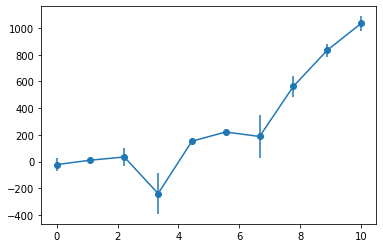

In [3]:
plt.errorbar(x,y,deltay, fmt='o-')

In [4]:
X = PolynomialFeatures(degree=2).fit_transform(x.reshape(-1,1))
model = LinearRegression()

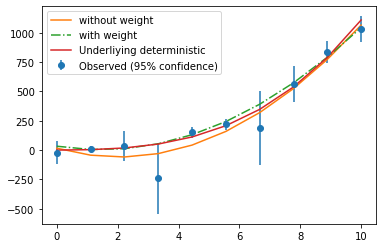

In [5]:
plt.errorbar(x,y,2*deltay, fmt='o', label='Observed (95% confidence)')

model.fit(X, y)
y_pred = model.predict(X)
plt.plot(x,y_pred, label='without weight')

model.fit(X, y, sample_weight = 1/deltay**2)
y_pred = model.predict(X)
plt.plot(x,y_pred,'-.', label='with weight')

#Para comparar con el proceso determinista de fondo, sin ruido:
plt.plot(x,x**3 + x**2 + x, label='Underliying deterministic')

plt.legend()
plt.show()